#DA-AG-015
**Boosting Techniques**

**Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.**

**Answer.** Boosting in Machine Learning is an ensemble technique that combines multiple weak learners, usually simple models like decision stumps, to form a strong predictive model. It works sequentially, where each new model focuses on correcting the errors made by the previous ones. By assigning higher weights to misclassified instances, boosting ensures that difficult cases receive more attention. This iterative process reduces bias and variance, improving accuracy and robustness. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?**

**Answer.** AdaBoost and Gradient Boosting differ mainly in how they train models and correct errors. AdaBoost assigns weights to each data point and increases the weights of misclassified samples so that the next weak learner focuses more on those difficult cases. It combines learners by weighted majority voting. Gradient Boosting, on the other hand, trains models by minimizing a loss function using gradient descent. Each new model is fitted to the residual errors of the previous model, gradually reducing overall prediction errors.


**Question 3: How does regularization help in XGBoost?**

**Answer.**Regularization in XGBoost helps prevent overfitting and improves generalization of the model. It introduces penalty terms in the objective function: L1 regularization (Lasso), which encourages sparsity by shrinking less important feature weights to zero, and L2 regularization (Ridge), which smoothens weights to avoid extreme values. By controlling model complexity through parameters like lambda and alpha, XGBoost balances bias and variance. This ensures that the model doesn’t just memorize training data but performs well on unseen data, enhancing robustness and stability.


**Question 4: Why is CatBoost considered efficient for handling categorical data?**

**Answer.** CatBoost is considered efficient for handling categorical data because it uses advanced encoding techniques instead of traditional one-hot encoding. It applies ordered target statistics and permutation-driven encoding, which transform categorical features into numerical values while reducing data leakage and overfitting. This allows CatBoost to natively process high-cardinality categorical variables without excessive preprocessing. Additionally, it automates feature handling, saves memory, and speeds up training compared to manual encoding methods. This makes CatBoost highly effective for datasets with many categorical features.


**Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?**

**Answer.** Boosting techniques are preferred over bagging methods in scenarios where high accuracy and handling complex patterns are required. For example, in finance, boosting is used for credit scoring, fraud detection, and risk assessment due to its ability to capture subtle patterns. In healthcare, it aids in disease prediction and medical diagnosis by improving model precision. In marketing, boosting enhances customer churn prediction and recommendation systems. Additionally, in cybersecurity, boosting helps detect anomalies and malicious activities, where even small improvements in accuracy are critical.


**Datasets:**

● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

**Question 6: Write a Python program to:**

**● Train an AdaBoost Classifier on the Breast Cancer dataset**

**● Print the model accuracy**

**Answer.**

In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)

AdaBoost Classifier Accuracy: 0.9736842105263158



**Question 7: Write a Python program to:**

**● Train a Gradient Boosting Regressor on the California Housing dataset**

**● Evaluate performance using R-squared score**

**Answer.**

In [ ]:

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [ ]:

# Evaluate with R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared Score:", r2)

Gradient Boosting Regressor R-squared Score: 0.8004451261281281


**Question 8: Write a Python program to:**

**● Train an XGBoost Classifier on the Breast Cancer dataset**

**● Tune the learning rate using GridSearchCV**

**● Print the best parameters and accuracy*|*

**Answer.**

In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train model
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("XGBoost Classifier Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:23:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy: 0.956140350877193


**Question 9: Write a Python program to:**

**● Train a CatBoost Classifier**

**● Plot the confusion matrix using seaborn**

CatBoost Classifier Accuracy: 0.9649122807017544


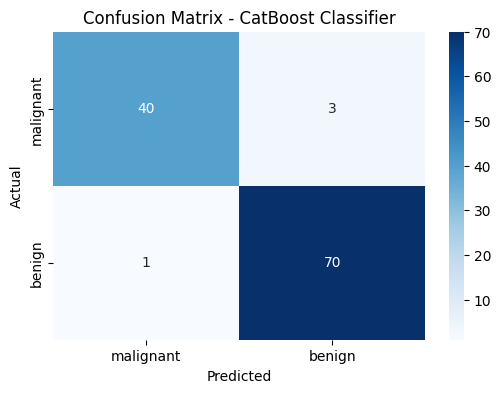

In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier (silent mode)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

**Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.**

**The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.**
**Describe your step-by-step data science pipeline using boosting techniques:**

**● Data preprocessing & handling missing/categorical values**

**● Choice between AdaBoost, XGBoost, or CatBoost**

**● Hyperparameter tuning strategy**

**● Evaluation metrics you'd choose and why**

**● How the business would benefit from your model**

**Answer.** **1. Data Preprocessing & Handling Missing/Categorical Values**

Handle missing values: Use median/mean imputation for numeric features and mode or CatBoost’s built-in handling for categorical variables.
Encode categorical features: Prefer CatBoost (native support) or target encoding if using XGBoost/AdaBoost.
Normalize or scale numeric features if required.
Address class imbalance using SMOTE, class weights, or boosting algorithms’ scale_pos_weight.
**2. Choice of Algorithm**


CatBoost is ideal since it handles categorical features and missing values efficiently, reducing preprocessing effort.
XGBoost can also be considered due to strong performance and flexibility in imbalanced datasets.
**3. Hyperparameter Tuning Strategy**


Use GridSearchCV or RandomizedSearchCV with parameters like learning_rate, max_depth, n_estimators, and regularization terms (lambda, alpha).
Early stopping on a validation set to avoid overfitting.
**4. Evaluation Metrics**

Since data is imbalanced, use metrics beyond accuracy:

AUC-ROC: To measure discrimination power.
Precision, Recall, and F1-score: Especially recall (minimizing false negatives, i.e., missed defaults).
Confusion Matrix for interpretability.
**5. Business Benefits**


Improved risk assessment by accurately identifying potential defaulters.
Helps in credit policy design, reducing financial losses.
Enables personalized offers for low-risk customers, boosting trust and profitability.
Ensures compliance with regulatory requirements through transparent model evaluation.